### This script is to compare 4 cases: 3_years_no_repeat, 5_years_no_repeat, 3_years_repeat, 5_years_repeat
Before running this script, you need to run the following scripts:
```python
python extract_all_pnr_fpr.py 
```

for each case. This script will generate the `log_fnr_fpr` directory for each case. Then you can run this script to compare the 4 cases.

In [1]:
# /home/cw3344@drexel.edu/health_fairness_5Y_repeat
# /home/cw3344@drexel.edu/health_fairness_3Y_repeat
# /home/cw3344@drexel.edu/health_fairness_5Y_
# /home/cw3344@drexel.edu/health_fairness_3Y 
import os
import glob
import pandas as pd 
# make a pandas dataframe to store the results
# columns: dataset, repeat, model, metric, value
whole_df = pd.DataFrame(columns=["dataset", "repeat", "model", "fnr","fpr","acc"])
for directory in sorted(["/home/cw3344@drexel.edu/health_fairness_5Y_repeat", "/home/cw3344@drexel.edu/health_fairness_3Y_repeat", "/home/cw3344@drexel.edu/health_fairness_5Y_", "/home/cw3344@drexel.edu/health_fairness_3Y"]):
    basename = directory.split("/")[-1]
    directory_name = "three-years" if "3Y" in basename else "five-years"
    repeat = "oversampled" if "repeat" in basename else "original"
    print(directory_name, repeat)
    fnr_fpr_dir_list = sorted(glob.glob(os.path.join(directory, "log_fnr_fpr", "*.txt")))
    for fnr_fpr_file in fnr_fpr_dir_list:
        fnr_fpr_file_basename = os.path.basename(fnr_fpr_file)
        print(fnr_fpr_file_basename)
        # the following is the content of the file:
        
        # for model_logistic_split_1_log_disc:
        # metric FPR:
        # |          1 |          2 |          3 |          4 |          5 |          6 |          7 |          8 |          9 |         10 | 
        # | 0.27184466 | 0.14728682 | 0.11538462 | 0.21212121 | 0.05833333 | 0.22222222 | 0.21100917 | 0.15200000 | 0.19310345 | 0.15873016 | 
        # metric FNR:
        # |          1 |          2 |          3 |          4 |          5 |          6 |          7 |          8 |          9 |         10 | 
        # | 0.13513514 | 0.31764706 | 0.28440367 | 0.28947368 | 0.26881720 | 0.27586207 | 0.22115385 | 0.15909091 | 0.22058824 | 0.18390805 | 
        # metric ACC:
        # |          1 |          2 |          3 |          4 |          5 |          6 |          7 |          8 |          9 |         10 | 
        # | 0.79906542 | 0.78504673 | 0.79812207 | 0.74647887 | 0.84976526 | 0.75586854 | 0.78403756 | 0.84507042 | 0.79812207 | 0.83098592 | 
        # end of file
        
        # I want to print out mean of FPR, FNR, ACC from this file:
        with open(fnr_fpr_file, "r") as f:
            lines = f.readlines()
        # get the next of next line after the line starts with "metric FPR:"
        fpr_line = lines[lines.index("metric FPR:\n") + 2]
        fnr_line = lines[lines.index("metric FNR:\n") + 2]
        acc_line = lines[lines.index("metric ACC:\n") + 2]
        fpr_line_split = fpr_line.split("|")
        fnr_line_split = fnr_line.split("|")
        acc_line_split = acc_line.split("|")
        fpr_numbers = [float(number) for number in fpr_line_split[2:-1]]
        fnr_numbers = [float(number) for number in fnr_line_split[2:-1]]
        acc_numbers = [float(number) for number in acc_line_split[2:-1]]
        fpr_mean = sum(fpr_numbers) / len(fpr_numbers)
        fnr_mean = sum(fnr_numbers) / len(fnr_numbers)
        acc_mean = sum(acc_numbers) / len(acc_numbers)
        fpr_std = sum([(number - fpr_mean)**2 for number in fpr_numbers]) / len(fpr_numbers)
        fnr_std = sum([(number - fnr_mean)**2 for number in fnr_numbers]) / len(fnr_numbers)
        acc_std = sum([(number - acc_mean)**2 for number in acc_numbers]) / len(acc_numbers)
        # save the numbers into the dataframe
        model_name = fnr_fpr_file_basename.replace("model_", "").replace("_log_disc.txt", "")
        dataset_name = directory_name
        repeat_name = repeat
        whole_df = whole_df.append({"dataset": dataset_name, "repeat": repeat_name, "model": model_name, "fnr_mean": fnr_mean, "fpr_mean": fpr_mean, "acc_mean": acc_mean, "fnr_std": fnr_std, "fpr_std": fpr_std, "acc_std": acc_std}, ignore_index=True)
        # print("FPR mean: {}".format(fpr_mean))
        # print("FNR mean: {}".format(fnr_mean))
        # print("ACC mean: {}".format(acc_mean))
        # print(fpr_mean)
        # print(fnr_mean)
        # print(acc_mean)
        # with open(os.path.join(directory, "log_fnr_fpr", fnr_fpr_file_basename.replace(".txt", "_mean.txt")), "w") as f:
        #     f.write("FPR mean: {}\n".format(fpr_mean))
        #     f.write("FNR mean: {}\n".format(fnr_mean))
        #     f.write("ACC mean: {}\n".format(acc_mean))
        print("========================================")
    print("========================================")
    # print df
    print(whole_df)
    # save df
    whole_df.to_csv("whole_df.csv", index=False)
    

    
    

three-years original
model_logistic_split_0_log_disc.txt
model_logistic_split_1_log_disc.txt
model_mlp3_split_0_log_disc.txt
model_mlp3_split_1_log_disc.txt
model_mlp6_split_0_log_disc.txt
model_mlp6_split_1_log_disc.txt
       dataset    repeat             model  fnr  fpr  acc  fnr_mean  fpr_mean  \
0  three-years  original  logistic_split_0  NaN  NaN  NaN  0.734646  0.050664   
1  three-years  original  logistic_split_1  NaN  NaN  NaN  0.241438  0.143969   
2  three-years  original      mlp3_split_0  NaN  NaN  NaN  0.660471  0.087721   
3  three-years  original      mlp3_split_1  NaN  NaN  NaN  0.225533  0.185041   
4  three-years  original      mlp6_split_0  NaN  NaN  NaN  0.712597  0.074243   
5  three-years  original      mlp6_split_1  NaN  NaN  NaN  0.208703  0.189574   

   acc_mean   fnr_std   fpr_std   acc_std  
0  0.816282  0.014703  0.001121  0.000813  
1  0.812314  0.004298  0.002607  0.001059  
2  0.805004  0.014235  0.001471  0.001200  
3  0.796145  0.001590  0.004065  0.

/tmp/ipykernel_546090/628717392.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_df = whole_df.append({"dataset": dataset_name, "repeat": repeat_name, "model": model_name, "fnr_mean": fnr_mean, "fpr_mean": fpr_mean, "acc_mean": acc_mean, "fnr_std": fnr_std, "fpr_std": fpr_std, "acc_std": acc_std}, ignore_index=True)
/tmp/ipykernel_546090/628717392.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_df = whole_df.append({"dataset": dataset_name, "repeat": repeat_name, "model": model_name, "fnr_mean": fnr_mean, "fpr_mean": fpr_mean, "acc_mean": acc_mean, "fnr_std": fnr_std, "fpr_std": fpr_std, "acc_std": acc_std}, ignore_index=True)
/tmp/ipykernel_546090/628717392.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

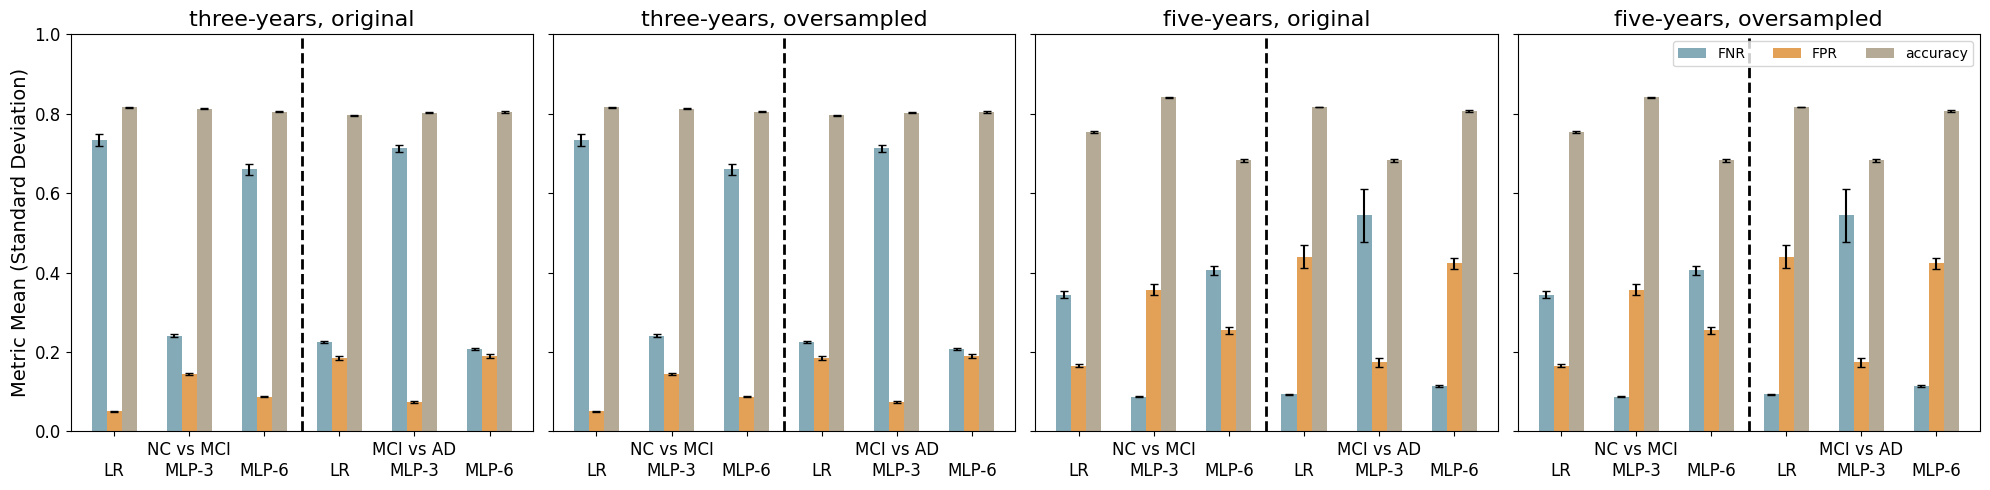

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
xtick_fontsize = 12
ytick_fontsize = 12
ylabel_fontsize = 14
title_fontsize = 16
def make_brighter(color, factor=0.2):
    white = (1, 1, 1)
    brighter_color = tuple(c + (white[i] - c) * factor for i, c in enumerate(color))
    return brighter_color


# Load the dataset
df = pd.read_csv('whole_df.csv')

# Setup the figure and axes for 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Define the metrics and their labels
metrics = ['fnr', 'fpr', 'acc']
metric_labels = ['FNR', 'FPR', 'accuracy']

heavier_colors = {
    'heavier_lightblue': (0.5411764705882353, 0.6745098039215687, 0.7215686274509804),
    'heavier_peachpuff': (0.8, 0.6823529411764706, 0.5803921568627451),
    'heavier_lightgrey': (0.6588235294117647, 0.6588235294117647, 0.6588235294117647)
}
# heavier_colors = {color: make_brighter(rgb, factor=0.3) for color, rgb in heavier_colors.items()}

colors = ['lightblue', 'peachpuff', 'lightgrey', ]
# colors are from https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# make these colors heavier
colors = [heavier_colors['heavier_lightblue'], heavier_colors['heavier_peachpuff'], heavier_colors['heavier_lightgrey']]
# rgba(133,170,183,255)
# rgba(227,161,87,255)
# rgba(180,170,150,255)
# write the colors above from rgba to 0-1
colors = [(133/255,170/255,183/255), (227/255,161/255,87/255), (180/255,170/255,150/255)]

# Define the groups and their labels for the x-axis
groups = ['logistic_split_0', 'mlp3_split_0', 'mlp6_split_0', 'logistic_split_1', 'mlp3_split_1', 'mlp6_split_1']
group_labels = ['Logistic\nSplit 0', 'MLP3\nSplit 0', 'MLP6\nSplit 0', 'Logistic\nSplit 1', 'MLP3\nSplit 1', 'MLP6\nSplit 1']
group_labels = [tmp.split('\n')[1]+'\n'+tmp.split('\n')[0] for tmp in group_labels]
group_labels = [tmp.replace('Logistic','LR').replace('Split 0', 'NC vs MCI').replace('Split 1', 'MCI vs AD').replace('MLP','MLP-') for tmp in group_labels]
group_labels = [tmp.replace('NC vs MCI','').replace('MCI vs AD', '') if i not in [1,4] else tmp for i, tmp in enumerate(group_labels)]
# The x position of groups
x_pos = np.arange(len(groups))  # the label locations

# The width of the bars
bar_width = 0.2

# Generating the subplots
for i, (dataset, repeat) in enumerate([("three-years", "original"), ("three-years", "oversampled"), 
                                       ("five-years", "original"), ("five-years", "oversampled")]):

    for j, metric in enumerate(metrics):
        means = df[(df['dataset'] == dataset) & (df['repeat'] == repeat) & (df['model'].isin(groups))][f'{metric}_mean']
        stds = df[(df['dataset'] == dataset) & (df['repeat'] == repeat) & (df['model'].isin(groups))][f'{metric}_std']
        
        # We offset the x position for each metric to avoid overlap
        # axs[i].bar(x_pos + j * bar_width, means, bar_width, yerr=stds, label=metric_labels[j], color=colors[j], capsize=5, alpha=1)
        # make only std bar thinner and lighter
        axs[i].bar(x_pos + j * bar_width, means, bar_width, yerr=stds, label=metric_labels[j], color=colors[j], capsize=5, alpha=1,
                   error_kw=dict(capsize=3))
    # Adding division lines in the middle of 'NC vs MCI' and 'MCI vs AD' for each subplot
    division_line_positions = [3]  # Positions between the 'NC vs MCI' and 'MCI vs AD' groups
    number_of_metrics = len(metrics)
    for pos in division_line_positions:
        line_position = x_pos[pos] + bar_width * (number_of_metrics - 4.5)
        # increase thickness of the line
        axs[i].axvline(x=line_position, color='black', linestyle='--', linewidth=2, alpha=1)

    # Set the x-axis and y-axis labels
    # axs[i].set_xlabel('Models and Splits')
    axs[i].set_title(f'{dataset.capitalize().lower()}, {repeat.capitalize().lower()}', fontsize=title_fontsize)
    axs[i].set_xticks(x_pos + bar_width)
    axs[i].set_xticklabels(group_labels)
    axs[i].set_ylim(0, 1)
    # Set font size for x-tick and y-tick labels
    axs[i].tick_params(axis='x', labelsize=xtick_fontsize)
    axs[i].tick_params(axis='y', labelsize=ytick_fontsize)

    # Set the y-axis label with specific font size
    axs[i].set_ylabel('Metric Mean (Standard Deviation)' if i == 0 else '', fontsize=ylabel_fontsize)
    
    if i == 3:
        axs[i].legend(title='', loc='upper right',ncol=3)

# Adjust layout for better fit
plt.tight_layout()

# save the plot
if not os.path.exists('plots_for_paper'):
    os.makedirs('plots_for_paper')
plt.savefig('plots_for_paper/discrete_fnr_fpr_acc.pdf', format='pdf', bbox_inches='tight')
